<a href="https://colab.research.google.com/github/salmon9/python/blob/main/circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from matplotlib import pyplot as plt

In [27]:
class Model (nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1 = nn.Linear(1,20)
    self.l2 = nn.Linear(20,40)
    self.l3 = nn.Linear(40,1)

  def forward(self,x):
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = self.l3(x)
    return x 

In [28]:
def get_dataset(n):
    x1 = -(np.random.random(n)) 
    x2 = np.random.random(n)
    x = x1 + x2
    y = np.sqrt(1-x*x) #ここを変える
    x = x.reshape(n, 1) #(n, 1)の配列にする
    y = y.reshape(n, 1) #(n, 1)の配列にする
    x = torch.FloatTensor(x) # floatに変える
    y = torch.FloatTensor(y) # floatに変える
    return torch.utils.data.TensorDataset(x, y)

In [29]:
data_number = 100000 #データ数
batch_size  = 1000 # 1つのミニバッチのデータ数
data_loader = torch.utils.data.DataLoader(get_dataset(data_number), batch_size=batch_size)

In [30]:
model = Model()
criterion = nn.MSELoss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
loss_log = [] 
epoch = 100
for t in range(epoch):
    for xt, yt in data_loader: 
        optimizer.zero_grad() 
        y_model = model(xt)
        loss = criterion(y_model, yt)
        loss.backward()
        optimizer.step()
    print(t, loss.item())
    loss_log.append(loss.item())

0 0.0014697227161377668
1 0.0007220956613309681
2 0.0005065658478997648
3 0.000391956273233518
4 0.0002947714820038527
5 0.0002197956491727382
6 0.00018089737568516284
7 0.00015978910960257053
8 0.00014552677748724818
9 0.00012818661343771964
10 0.00010656187077984214
11 9.107595542445779e-05
12 8.294767030747607e-05
13 7.147499854909256e-05
14 6.716039933962747e-05
15 6.944731285329908e-05
16 5.299236363498494e-05
17 4.7409524995600805e-05
18 4.408890163176693e-05
19 4.3100808397866786e-05
20 4.6556986490031704e-05
21 4.536909546004608e-05
22 4.235115920891985e-05
23 4.035517849843018e-05
24 4.363211337476969e-05
25 4.2947609472321346e-05
26 4.585534043144435e-05
27 2.8113250664318912e-05
28 3.821136851911433e-05
29 4.424077269504778e-05
30 3.0052227884880267e-05
31 5.096501263324171e-05
32 5.332196087692864e-05
33 2.6931076718028635e-05
34 5.362918454920873e-05
35 3.389143603271805e-05
36 3.4942546335514635e-05
37 3.562851998140104e-05
38 3.6703502701129764e-05
39 3.49560214090161e-0

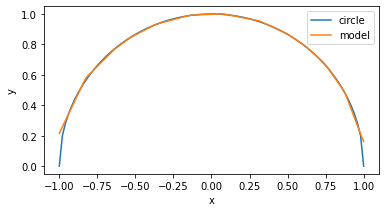

In [36]:
##学習したモデルと関数を比較する

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

x = np.linspace(-1, 1, 100)
plt.plot(x, np.sqrt(1-x*x), label="circle")
x_model = torch.FloatTensor(x.reshape(100,1))
y_model = model(x_model)
y = y_model.detach().np().reshape(1,100)[0] # プロット用に変換、detach()が必要

plt.plot(x, y, label='model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()